In [2]:
#!/usr/bin/env python
# coding: utf-8
import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from tensorflow.keras.layers import SpatialDropout2D

In [3]:
# The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home
# Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv

def get_data(filename):
  with open(filename) as training_file:
    content=pd.read_csv(training_file)
    print(type(content))
    pixels=content.iloc[:,1:785].values
    labels=content.iloc[:,0].values
    labels=(labels-np.ones(labels.shape)*(labels>8)).astype(int)
    print(type(pixels))
    images=pixels.reshape(-1,28,28)
  return images, labels

In [5]:
training_images, training_labels=get_data('sign_mnist_train.csv')
testing_images, testing_labels=get_data('sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)
print(training_labels[:9])

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)
[ 3  6  2  2 12 15  8 21  3]


In [6]:
classes, train_counts=np.unique(training_labels, return_counts=True)
_, test_counts=np.unique(testing_labels, return_counts=True)

print(classes)
print(train_counts)
print(len(classes))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
[1126 1010 1144 1196  957 1204 1090 1013 1162 1114 1241 1055 1151 1196
 1088 1279 1294 1199 1186 1161 1082 1225 1164 1118]
24


In [7]:
training_images=np.expand_dims(training_images, axis=3)
testing_images=np.expand_dims(testing_images, axis=3)
training_labels=np.expand_dims(training_labels, axis=1)
testing_labels=np.expand_dims(testing_labels, axis=1)
training_labels=tf.keras.utils.to_categorical(training_labels, num_classes=24)
testing_labels=tf.keras.utils.to_categorical(testing_labels, num_classes=24)

In [19]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)

validation_datagen=ImageDataGenerator(
    rescale=1./255)

print(training_images.shape)
print(testing_images.shape)
print(training_labels.shape)
print(testing_labels.shape)
print(training_labels[:3])
print(training_images.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)
(27455, 24)
(7172, 24)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
(27455, 28, 28, 1)


In [37]:
# model=tf.keras.models.Sequential([
#                                   tf.keras.layers.Conv2D(64,3,activation='elu', input_shape=(28,28,1)),
#                                   tf.keras.layers.MaxPooling2D(2,2),
#                                   #tf.keras.layers.Conv2D(32,3, activation='relu'),
#                                   #tf.keras.layers.MaxPooling2D(2,2),
#                                   tf.keras.layers.Flatten(),
#                                   tf.keras.layers.Dense(128, activation='elu'),
#                                   #tf.keras.layers.Dense(64,activation='relu'),
#                                   tf.keras.layers.Dense(24, activation='softmax')
# ])

In [12]:
training_data=train_datagen.flow(training_images, training_labels, batch_size=32)
validation_data=validation_datagen.flow(testing_images, testing_labels, batch_size=32)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(24, activation='softmax')])

opt=tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(training_data,epochs=10, validation_data=validation_data)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


858/858 [==============================] - 26s 19ms/step - loss: 1.4067 - accuracy: 0.5610 - val_loss: 0.3519 - val_accuracy: 0.9010
Epoch 2/10
858/858 [==============================] - 16s 19ms/step - loss: 0.4424 - accuracy: 0.8558 - val_loss: 0.2193 - val_accuracy: 0.9371
Epoch 3/10
858/858 [==============================] - 16s 19ms/step - loss: 0.2423 - accuracy: 0.9209 - val_loss: 0.0927 - val_accuracy: 0.9748
Epoch 4/10
858/858 [==============================] - 17s 20ms/step - loss: 0.1578 - accuracy: 0.9493 - val_loss: 0.0740 - val_accuracy: 0.9693
Epoch 5/10
858/858 [==============================] - 16s 19ms/step - loss: 0.1108 - accuracy: 0.9639 - val_loss: 0.0384 - val_accuracy: 0.9887
Epoch 6/10
858/858 [==============================] - 16s 19ms/step - loss: 0.0851 - accuracy: 0.9736 - val_loss: 0.0408 - val_accuracy: 0.9877
Epoch 7/10
858/858 [==============================] - 16s 19ms/step - loss: 0.0728 - accuracy: 0.9767 - val_loss: 0.0509 - val_accuracy: 0.9847
Epo

In [20]:
score = model.evaluate(testing_images, testing_labels, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 29.972238540649414 / Test accuracy: 0.9283323884010315


In [21]:
# Plot the validation and training data separately
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

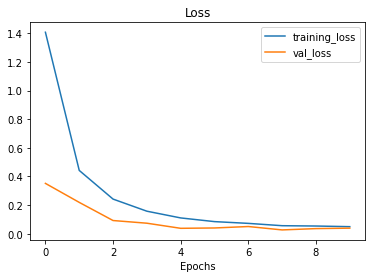

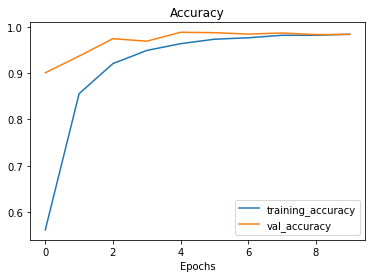

In [22]:
# Check out the loss curves of model_4
plot_loss_curves(history)

In [23]:
model.save('SignMnist.h5')